# crawling - selenium

In this notebook, we will perform a web crawling to complete the DF.

### Imports

In [1]:
!pip install selenium

In [2]:
import pandas as pd
import numpy as np
import time
from PIL import Image
import io
import requests

import os
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains

In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


### Install Driver and set chrome options

The Chromeoptions class is a concept in Selenium WebDriver for manipulating various Chrome driver features.
Why do we use it? we can access everything that exists on the page and not just what is currently on the screen.
To extract the data from the table we need to make WebDriverWait visibility_of_element_located ().

In [4]:
options = Options()
options.add_argument("start-maximized")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('excludeSwitches', ['enable-logging'])
options.add_experimental_option('useAutomationExtension', False)
options.add_argument('--disable-blink-features=AutomationControlled')

driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)



====== WebDriver manager ======
Current google-chrome version is 102.0.5005
Get LATEST chromedriver version for 102.0.5005 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\gonip\.wdm\drivers\chromedriver\win32\102.0.5005.61]
C:\Users\gonip\AppData\Local\Temp/ipykernel_19548/3690626548.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


### Specify Search URL 

In [5]:
search_url="https://www.cbs.gov.il/he/Statistics/Pages/%D7%9E%D7%97%D7%95%D7%9C%D7%9C%D7%99%D7%9D/%D7%9E%D7%97%D7%95%D7%9C%D7%9C-%D7%A1%D7%A4%D7%99%D7%A8%D7%95%D7%AA-%D7%AA%D7%A0%D7%95%D7%A2%D7%94.aspx" 
driver.get(search_url)

We want the all site to go up before we start moving on him

In [6]:
time.sleep(2)

We tried to find the data on the site and were unsuccessful. After browsing the internet and finding similar problemd we understand that the site is on IFRAME

<div>
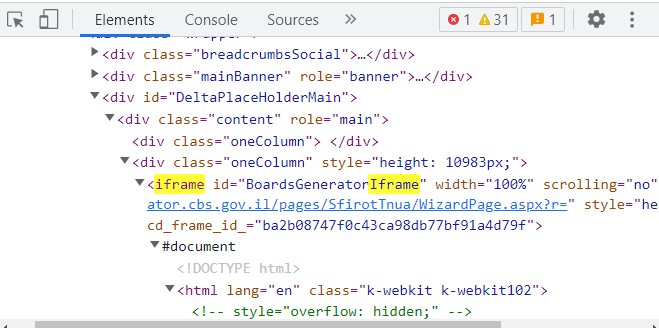
</div>

In [7]:
WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.XPATH,"//iframe[starts-with(@id, 'BoardsGeneratorIframe')]")))

True

We will click on the following buttons to get to the page I want to attract

<div>
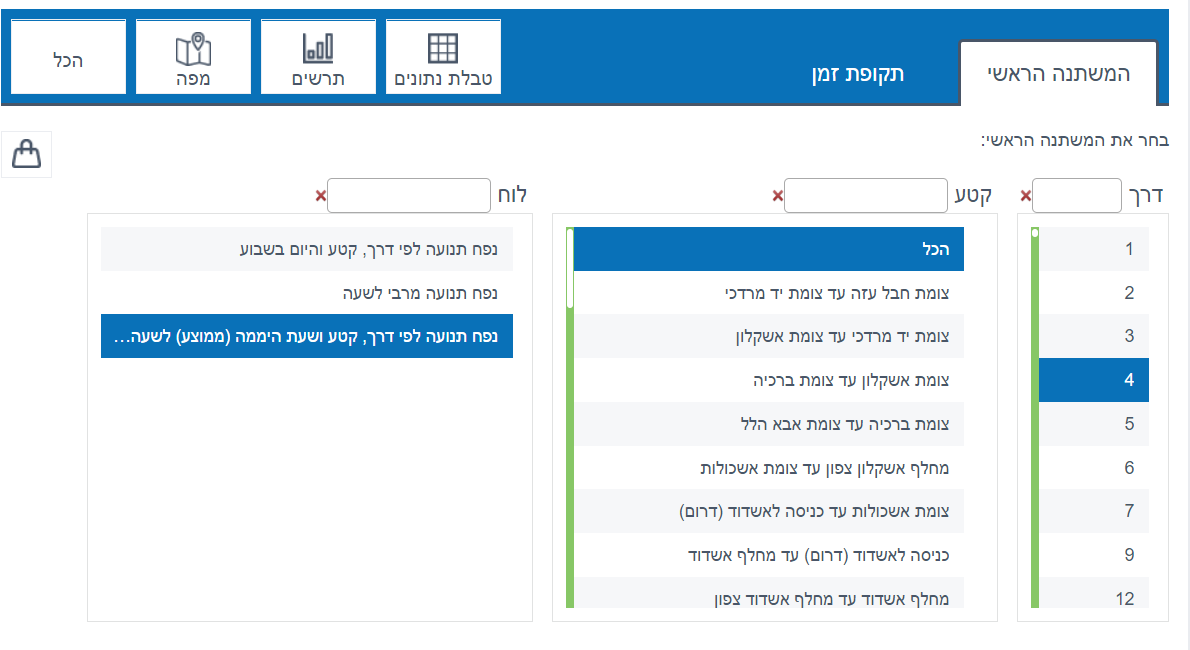
</div>

In [10]:
row_num_4=driver.find_element(By.XPATH, '//*[@id="mainVariableController"]/div[1]/ul/li[1]/div/div/div/div[1]/ul/li[4]/a')
row_num_4.click()
volume=driver.find_element(By.XPATH, '//*[@id="mainVariableController"]/div[1]/ul/li[3]/div/div/div/div/ul/li[3]/a')
volume.click()

<div>
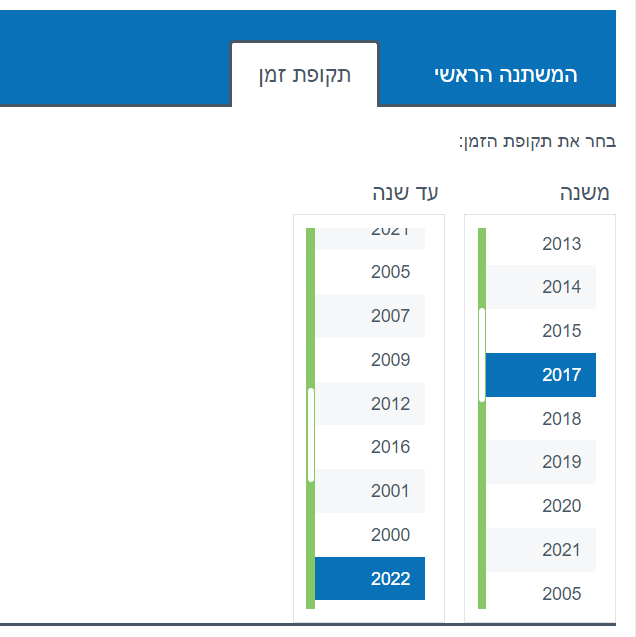
</div>

In [14]:
time_of_data=driver.find_element(By.XPATH, '//*[@id="tabsController"]/div[1]/ul/li[2]')
time_of_data.click()

elemet = driver.find_element(By.XPATH, '//*[@id="periodTimeController"]/div/ul/li[1]/div/div/div/div[1]/ul/li[11]/a')
actions = ActionChains(driver)
actions.move_to_element(elemet).perform()
elemet.click()

select_data=driver.find_element(By.XPATH, '//*[@id="periodTimeController"]/div/div/a')
select_data.click()

now we start to save the data (and the title of the table!) by page numbers (1-4)

#### title

In [15]:
data_titles=driver.find_elements(By.CSS_SELECTOR , "[role='columnheader']")
text_titles = [t.get_attribute('data-title') for t in data_titles]

#### table

Now we need to go from page to page and extract the information from him. We were able to save each page as a list of lists so we did a function that turns the information from a list of lists to DF.

In [16]:
def list_to_df(df, page_data):
    index=1
    for col in df.columns:
        df[col]=page_data[0][index]
        index=index+1
    return df

In [17]:
data_titles=driver.find_elements(By.CSS_SELECTOR , "[role='columnheader']")
text_titles = [t.get_attribute('data-title') for t in data_titles]

page_1_data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "table.k-selectable"))).get_attribute("outerHTML")

data_of_page_1= pd.read_html(page_1_data)
df_page_1 = pd.DataFrame(columns =text_titles)

df_page_1=list_to_df(df_page_1,data_of_page_1)

# we do a test how the data see
# df.to_csv("plz.csv"
#          , index=False
#          ,encoding='utf-8-sig')
df_page_1


,דרך,כיוון,שנה,חודש,ממוצע יומי באלפים,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...
1,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2017,11,2.8,16,10,4,4,8,...,187,239,189,174,155,110,84,66,52,26
2,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2018,4,3.2,13,6,5,6,7,...,198,251,204,199,208,129,91,74,58,28
3,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2019,6,3.5,24,11,6,6,6,...,218,268,228,218,223,143,108,90,77,46
4,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2020,7,2.8,29,16,9,9,10,...,160,191,173,139,145,141,117,98,68,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,דרך 4 קטע 185 מק''מ 156.2 עד ק''מ 159.5 מצומת ...,0,2022,1,31.2,347,198,144,114,186,...,2109,2167,2095,1906,1659,1481,1193,933,737,573
109,דרך 4 קטע 185 מק''מ 156.2 עד ק''מ 159.5 מצומת ...,1,2022,1,15.2,200,108,75,55,73,...,1045,1083,1113,1008,830,707,564,429,360,309
110,דרך 4 קטע 185 מק''מ 156.2 עד ק''מ 159.5 מצומת ...,2,2022,1,16.0,147,90,69,59,113,...,1064,1084,983,897,829,774,629,503,376,264
111,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...


In [18]:
next_page_to2=driver.find_element(By.XPATH, '//*[@id="grid"]/div[3]/a[3]/span')
next_page_to2.click()

page_2_data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "table.k-selectable"))).get_attribute("outerHTML")
df_page_2=pd.DataFrame(columns =text_titles)
data_of_page_2= pd.read_html(page_2_data)
df_page_2=list_to_df(df_page_2,data_of_page_2)
df_page_2

,דרך,כיוון,שנה,חודש,ממוצע יומי באלפים,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...,דרך: דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מ...
1,דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מצומת ...,1,2017,12,19.0,177,105,75,69,135,...,1188,1366,1269,1166,971,836,618,493,441,357
2,דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מצומת ...,2,2017,12,17.5,164,96,66,59,117,...,1121,1102,1063,995,989,822,637,455,433,273
3,דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מצומת ...,0,2018,4,35.7,378,211,157,131,262,...,2245,2479,2332,2138,1760,1576,1253,1104,972,669
4,דרך 4 קטע 190 מק''מ 159.5 עד ק''מ 161.4 מצומת ...,1,2018,4,17.9,189,106,78,66,131,...,1122,1239,1166,1069,880,788,627,552,486,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,דרך 4 קטע 220 מק''מ 168.7 עד ק''מ 177.4 מצומת ...,2,2021,3,15.4,72,42,34,41,116,...,1014,1017,1064,950,814,665,456,320,241,140
104,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...
105,דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מצומת ...,0,2018,7,15.0,126,74,47,47,103,...,904,1024,1060,996,883,753,597,471,354,257
106,דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מצומת ...,0,2019,11,14.8,86,49,40,44,115,...,976,1068,1053,897,709,606,427,334,265,180


In [19]:
next_page_to3=driver.find_element(By.XPATH, '//*[@id="grid"]/div[3]/a[3]/span')
next_page_to3.click()

page_3_data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "table.k-selectable"))).get_attribute("outerHTML")
df_page_3=pd.DataFrame(columns =text_titles)
data_of_page_3= pd.read_html(page_3_data)
df_page_3=list_to_df(df_page_3,data_of_page_3)
df_page_3

,דרך,כיוון,שנה,חודש,ממוצע יומי באלפים,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...,דרך: דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מ...
1,דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מצומת ...,0,2021,8,15.8,177,103,69,56,73,...,996,1055,1059,1037,949,843,654,506,444,302
2,דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מצומת ...,1,2021,8,8.0,102,63,40,27,35,...,479,474,516,506,504,451,347,241,189,151
3,דרך 4 קטע 230 מק''מ 177.4 עד ק''מ 190.8 מצומת ...,2,2021,8,7.8,75,40,30,28,38,...,517,581,544,531,445,392,307,265,255,150
4,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...,דרך: דרך 4 קטע 240 מק''מ 190.8 עד ק''מ 195.0 מ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,1,2017,1,37.2,651,402,251,202,237,...,2403,2856,2711,2449,2549,2139,1679,1389,1067,891
108,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,2,2017,1,32.9,421,251,194,165,232,...,1934,2019,2150,1937,1778,1648,1607,1080,782,612
109,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,0,2018,4,68.2,814,514,384,380,673,...,4105,4352,4377,4271,3665,3231,2813,2353,1803,1305
110,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,1,2018,4,34.2,465,275,214,190,256,...,2143,2282,2262,2430,2008,1785,1508,1248,967,738


In [20]:
next_page_to4=driver.find_element(By.XPATH, '//*[@id="grid"]/div[3]/a[3]/span')
next_page_to4.click()

page_4_data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "table.k-selectable"))).get_attribute("outerHTML")
df_page_4=pd.DataFrame(columns =text_titles)
data_of_page_4= pd.read_html(page_4_data)
df_page_4=list_to_df(df_page_4,data_of_page_4)
df_page_4

,דרך,כיוון,שנה,חודש,ממוצע יומי באלפים,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...,דרך: דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומ...
1,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,0,2019,11,66.4,562,435,369,556,1733,...,4418,4301,4048,3918,3448,2748,2206,1777,1560,1015
2,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,1,2019,11,35.0,324,260,194,236,545,...,2483,2436,2292,2328,1924,1518,1250,1017,934,621
3,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,2,2019,11,31.3,238,175,175,320,1188,...,1935,1864,1756,1590,1524,1230,956,760,627,394
4,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,0,2020,6,64.4,1115,623,446,378,613,...,3955,3912,3865,3848,3676,3128,2763,2349,1879,1458
5,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,1,2020,6,32.3,588,316,224,183,279,...,1997,2012,1931,1953,1882,1615,1425,1204,967,778
6,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,2,2020,6,32.1,528,306,222,194,334,...,1958,1900,1935,1895,1794,1513,1338,1146,911,679
7,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,0,2021,3,86.3,1173,667,479,413,683,...,5385,5397,5407,5212,4831,4396,3933,3222,2576,2100
8,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,1,2021,3,42.5,573,328,253,237,458,...,2568,2467,2520,2427,2299,1936,1756,1532,1235,1087
9,דרך 4 קטע 50 מק''מ 72.0 עד ק''מ 78.0 מצומת אשכ...,2,2021,3,43.9,600,339,226,175,225,...,2817,2929,2887,2785,2531,2460,2178,1690,1341,1013


now we conect all dfs from all pages to one df

In [21]:
frames = [df_page_1, df_page_2,df_page_3,df_page_4]
df_road_loads = pd.concat(frames)
# result = df.append(df2)
# result

# we do 'index=False,encoding='utf-8-sig'' because we have in the DF text in Hebrew
df_road_loads.to_csv("df_road_loads.csv"
         , index=False
         ,encoding='utf-8-sig')

In [22]:
df_road_loads

,דרך,כיוון,שנה,חודש,ממוצע יומי באלפים,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...,דרך: דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומ...
1,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2017,11,2.8,16,10,4,4,8,...,187,239,189,174,155,110,84,66,52,26
2,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2018,4,3.2,13,6,5,6,7,...,198,251,204,199,208,129,91,74,58,28
3,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2019,6,3.5,24,11,6,6,6,...,218,268,228,218,223,143,108,90,77,46
4,דרך 4 קטע 10 מק''מ 51.1 עד ק''מ 55.0 מצומת חבל...,0,2020,7,2.8,29,16,9,9,10,...,160,191,173,139,145,141,117,98,68,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,דרך 4 קטע 80 מק''מ 105.0 עד ק''מ 106.8 ממחלף ר...,2,2021,8,96.4,2643,1559,911,654,868,...,5735,5996,5892,5928,5956,5676,5241,4738,3414,2787
49,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...,דרך: דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממ...
50,דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממחלף ח...,0,2020,12,124.5,1390,823,538,319,424,...,8151,8067,7786,7333,7212,6725,5245,4339,3313,2073
51,דרך 4 קטע 84 מק''מ 106.8 עד ק''מ 109.3 ממחלף ח...,1,2020,12,56.3,681,415,271,155,186,...,3732,3690,3579,3345,3306,3140,2695,2115,1607,1052
